In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Sample - Superstore.csv')

df.head()

# Check that csv file has been read properly

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [48]:
df['Ship Date'] = pd.to_datetime(df['Ship Date']) # Changes the ship date data column to a datetime object

df['year'] = df['Ship Date'].dt.to_period('Y')

 # df = df.drop('4') # DELETE 2018 ROW - VERY LITTLE DATA - NEED TO FIGURE OUT HOW TO GET THIS TO WORK

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year
0,1,CA-2016-152156,11/8/2016,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,11/8/2016,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,6/12/2016,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,10/11/2015,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,10/11/2015,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


In [49]:
# Profit over time date frame

profitVsTime = df.groupby('year')['Profit'].sum().reset_index() # Gets the sum of profit for each month

profitVsTime.columns = ['year', 'Profit'] # Changes the column names 

profitVsTime.head()


,year,Profit
0,2014,47292.7255
1,2015,62881.5299
2,2016,82941.1017
3,2017,92346.8752
4,2018,934.7894


<Axes: xlabel='year', ylabel='Profit'>

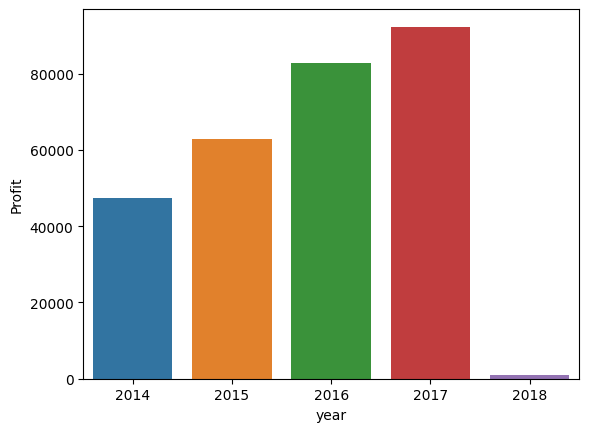

In [50]:
# Profit over time graph

sns.barplot(data=profitVsTime, x='year', y='Profit', hue = 'year')

In [51]:
# Sales over time data frame

salesVsTime = df.groupby('year')['Sales'].sum().reset_index() # Gets the sum of sales for each month

salesVsTime.columns = ['year', 'Sales'] # Changes the column names 

salesVsTime.head()

,year,Sales
0,2014,470383.1931
1,2015,479442.5020
2,2016,611325.7530
3,2017,730889.7154
4,2018,5159.6968


<Axes: xlabel='year', ylabel='Sales'>

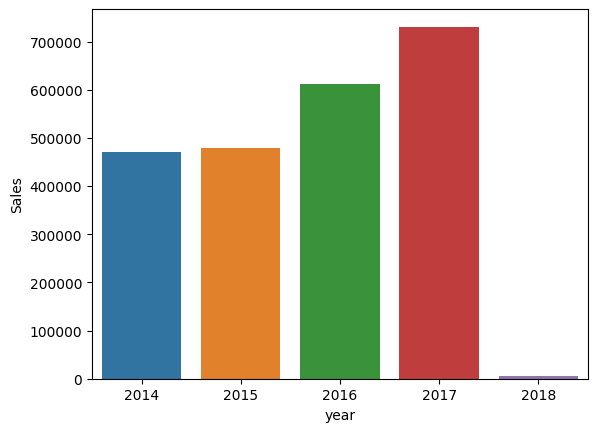

In [52]:
# sales over time graph

sns.barplot(data=salesVsTime, x='year', y='Sales', hue='year')



In [53]:
# USE THIS CELL TO CALCULATE PERCENT PROFIT - proft/sales x 100%



In [54]:
# Sales by region data frame

salesByRegion = df.groupby('Region')['Sales'].sum().reset_index() # Gets the sum of sales by region

salesByRegion.columns = ['Region', 'Sales'] # Changes the column names 

salesByRegion.head()

,Region,Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


<Axes: xlabel='Region', ylabel='Sales'>

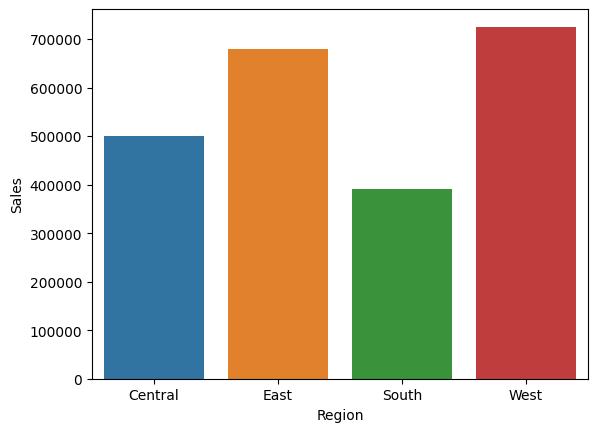

In [55]:
# Sales by region graph

sns.barplot(data=salesByRegion, x='Region', y='Sales', hue='Region')

In [56]:
# Sales by State data frame

salesByState= df.groupby('State')['Sales'].sum().reset_index() # Gets the sum of sales by state

salesByState.columns = ['State', 'Sales'] # Changes the column names 

salesByState.head()

,State,Sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457687.6315
4,Colorado,32108.1180


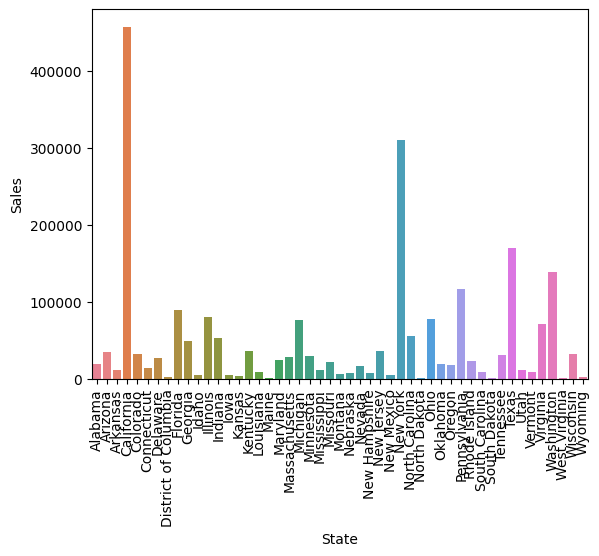

In [57]:
# Sales by state graph

salesVsStateGraph = sns.barplot(data=salesByState, x='State', y='Sales', hue='State')

for state in salesVsStateGraph.get_xticklabels():
    state.set_rotation(90)

In [58]:
# Sales by City
# Author: Tommy
df['City'].value_counts()

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64

In [59]:
# There are 531 cities which is too many to plot, so we will look at the top 10 cities for total sales
salesByCity = df.groupby('Sales')['City'].sum().reset_index()
topSalesByCity = salesByCity.sort_values(by='Sales', ascending=False)[0:10]
topSalesByCity

,Sales,City
5824,22638.480,Jacksonville
5823,17499.950,Lafayette
5822,13999.960,Seattle
5821,11199.968,New York City
5820,10499.970,Newark
5819,9892.740,Detroit
5818,9449.950,Minneapolis
5817,9099.930,Lakewood
5816,8749.950,Arlington
5815,8399.976,Philadelphia


Text(0.5, 1.0, 'Sales by City')

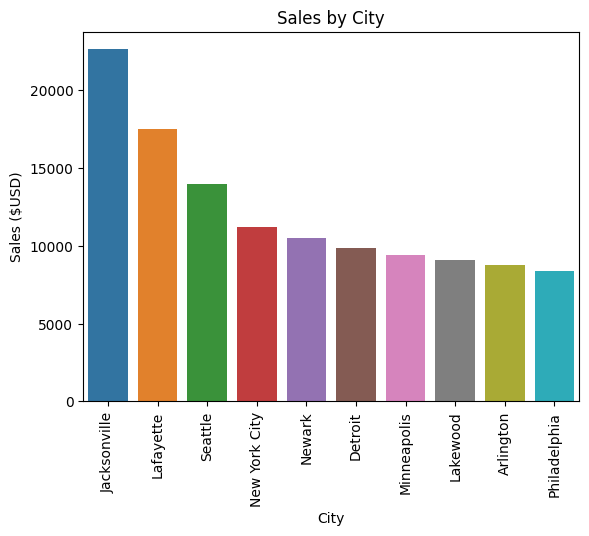

In [60]:
sns.barplot(topSalesByCity, x='City', y='Sales', hue='City')
plt.xticks(rotation=90)
plt.ylabel('Sales ($USD)')
plt.title('Sales by City')

In [61]:
# Sales by segment - Consumer, corporate, home office, etc
# Author - Tommy

salesBySegment = df.groupby('Segment')['Sales'].sum().reset_index()
salesBySegment.head()

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


Text(0.5, 1.0, 'Total Sales by Segment')

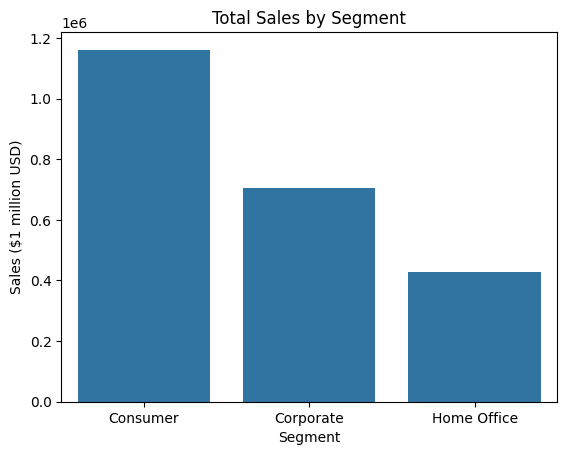

In [62]:
sns.barplot(salesBySegment, x='Segment', y='Sales')
plt.ylabel('Sales ($1 million USD)')
plt.title('Total Sales by Segment')

In [63]:
# Average profit per item sold by segment

In [64]:
# Number of sales by category

In [65]:
# Gross sales vs profit for each category

In [66]:
# Number of days to deliver for standard class

In [67]:
# Number of days to deliver for second class